#### Sales prediction using multiple linear regression
The aim of this work is to build multiple regression prediction  of sales using least squared methods . We have 3 independent variables (TV, Radio and Newspaper expenditures) and Sales dependent variables.

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and read first 5 rows of dataset
data = pd.read_excel('C:\\Users\\Islam.Mammadov\\Desktop\\py\\advertising.xlsx')
data.head()

,Date,TV,Radio,Newspaper,Sales
0,Jan-15,230.1,37.8,69.2,115.40
1,Jan-15,44.5,39.3,45.1,57.48
2,Jan-15,17.2,45.9,69.3,70.08
3,Jan-15,151.5,41.3,58.5,26.23
4,Jan-15,180.8,10.8,58.4,158.57


In [3]:
#Check for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Checking null values
data.isna().sum()

Date         0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# Examine a fee key descriptive statistics
data[["TV", "Newspaper", "Radio", "Sales"]].describe()

,TV,Newspaper,Radio,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,30.554000,23.264000,106.397250
std,85.854236,21.778621,14.846809,80.440775
min,0.700000,0.300000,0.000000,0.410000
25%,74.375000,12.750000,9.975000,41.542500
50%,149.750000,25.750000,22.900000,86.665000
75%,218.825000,45.100000,36.525000,161.452500
max,296.400000,114.000000,49.600000,338.160000


##### Building data visualization

C:\Users\Islam.Mammadov\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


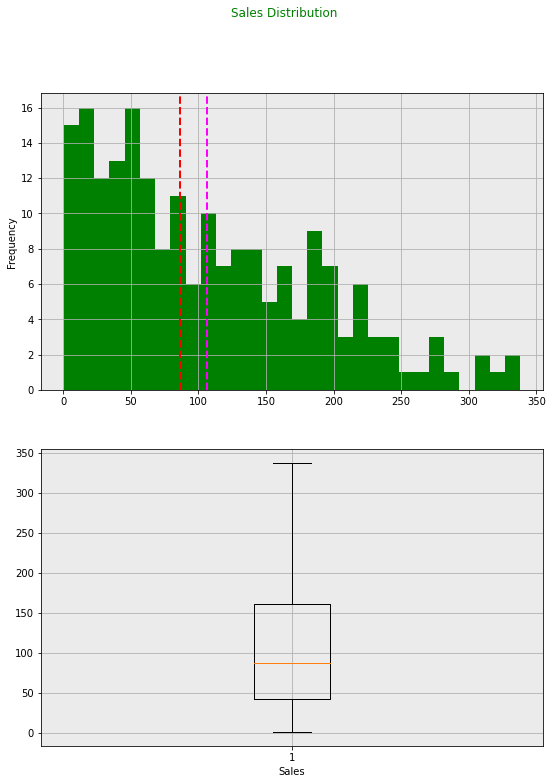

In [6]:
%matplotlib inline

label = data["Sales"] # Getting label column (y)
#Create subplots (2 rows 1 column)
fig, ax = plt.subplots(2,1, figsize=(9,12))
#Plot a histogram
ax[0].hist(label,bins=30, facecolor="green")
ax[0].set_ylabel("Frequency") # set name for the label
# add lines for mean and median
ax[0].axvline(label.mean(), color="magenta", linestyle="dashed", linewidth=2)
ax[0].axvline(label.median(), color="red", linestyle="dashed", linewidth=2)
# Plot a boxpot for Sales
ax[1].boxplot(label, vert=True)
ax[1].set_xlabel("Sales")
# Add a title
fig.suptitle("Sales Distribution", color="green")
# Display the figure
ax[0].grid(True)
ax[0].set_facecolor('#EBEBEB')
ax[1].grid(True)
ax[1].set_facecolor('#EBEBEB')
fig.show()

As we see that the distribution is right skewed. Mean is greater than median. Most of sales are generated between 0 and 110$

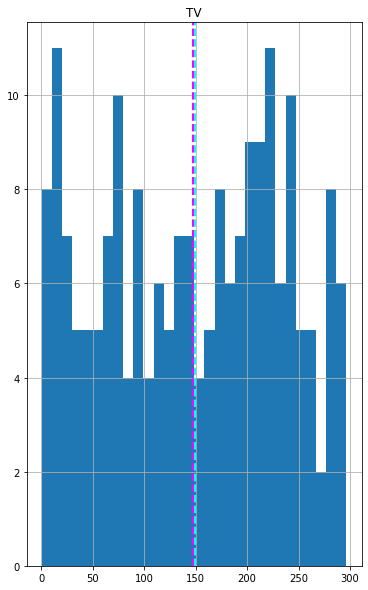

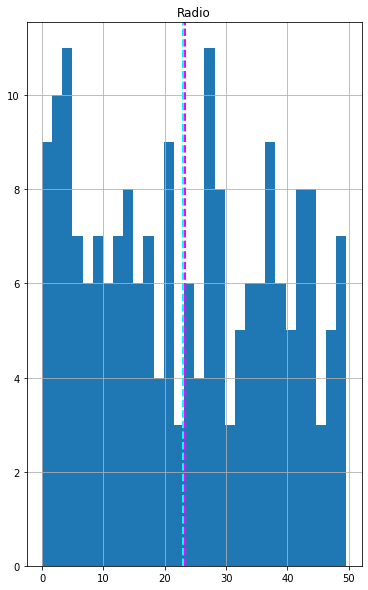

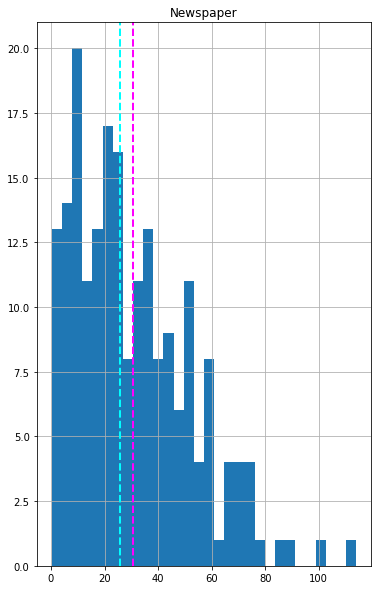

In [7]:
# Plot histograms for independt variables
for x_var in data[["TV", "Radio", "Newspaper"]]:
    fig= plt.figure(figsize=(6, 10))
    ax=fig.gca()
    data[x_var].hist(bins=30, ax=ax)
    ax.axvline(data[x_var].mean(), color="magenta", linestyle="dashed", linewidth=2)
    ax.axvline(data[x_var].median(), color="cyan", linestyle="dashed", linewidth=2)
    ax.set_title(x_var)
plt.show()

The Graphs is not very conclusive. Distribution of TV and Radio expenditure are merely uniform. When we look closely, newspaper expenditure is right skewed. The amount of money putting into newspaper advertisement is merey low compared the other two channels.

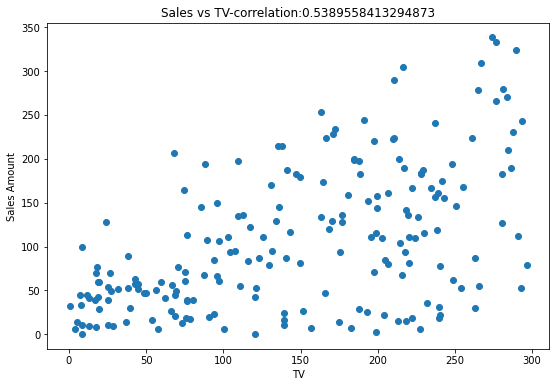

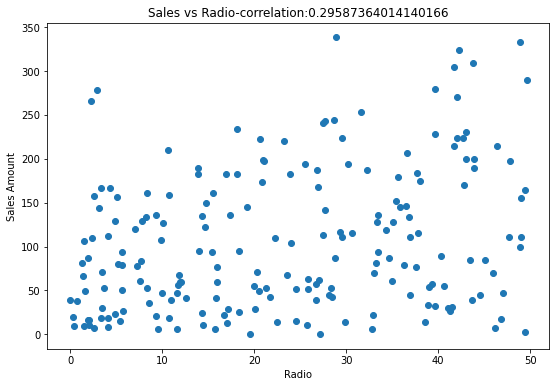

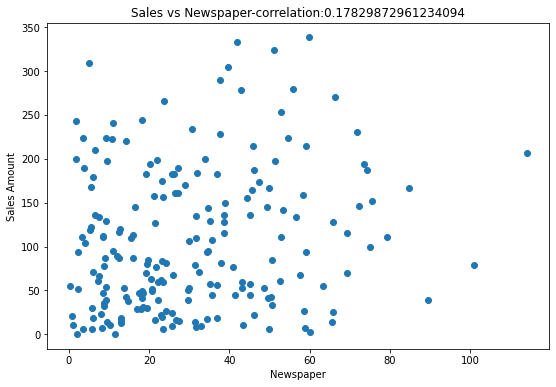

In [10]:
# Explore relationshops between dependent and indepent variables using scatter plot
for x_var in data[["TV", "Radio", "Newspaper"]]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[x_var]
    label = data['Sales']
    correlation  = feature.corr(label)
    plt.scatter(x = feature, y = label)
    plt.xlabel(x_var)
    plt.ylabel ('Sales Amount')
    plt.xlabel(x_var)
    ax.set_title('Sales vs ' + x_var + '-correlation:' + str(correlation))
plt.show()

#### Train a regression model

In [11]:
# Separate independent variables from dependent variable
X, y = data [["TV", "Radio", "Newspaper"]].values, data["Sales"].values
print('Features: ', X[:10], '\nLabels:', y[:10], sep  = '\n')

Features: 
[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]]

Labels:
[115.4   57.48  70.08  26.23 158.57  99.33   6.36   0.41  10.1  157.46]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# split data 70%-30% trainig set and test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20,random_state=0)
print(f'Training Set: {X_train.shape[0]} rows \nTest Set: {X_test.shape[0]} rows')

Training Set: 160 rows 
Test Set: 40 rows


In [14]:
# Train the model
from sklearn.linear_model import LinearRegression
# fit the linear model on training set
model=LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [15]:
# Evaluate the model
predictions=model.predict(X_test)
np.set_printoptions(suppress = True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual Labels: ' , y_test[:10])

Predicted labels:  [ 65.  43.  46. 206.  97.  36.  71. 134.  59. 135.]
Actual Labels:  [ 49.53  46.91  19.79 323.9  128.71  50.82  99.33  78.31 127.69 220.28]


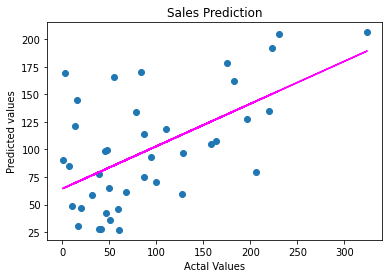

In [16]:
# Visualize predicted values vs y_test values
plt.scatter(y_test, predictions)
plt.xlabel("Actal Values")
plt.ylabel("Predicted values")
plt.title("Sales Prediction")
# make a regression line
z = np.polyfit(y_test, predictions,1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'magenta')
plt.show()

In [17]:
# Get residual metrics
from sklearn.metrics import mean_squared_error, r2_score
# Calculate residual metrics
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse )

r2 = r2_score(y_test, predictions)
print('R2:', r2)
print('Intercept: ', model.intercept_)
print('Coefficients for TV: ', model.coef_[0], '\nCoefficients for Radio: ', model.coef_[1], '\nCoefficients for Newspaper: ', model.coef_[2])

MSE: 4067.7258614909124
RMSE: 63.77872577506478
R2: 0.3147714574634075
Intercept:  1.9129575881832892
Coefficients for TV:  0.5091190449871843 
Coefficients for Radio:  1.446102020266921 
Coefficients for Newspaper:  -0.08217353014917439


#### The interpretation
Since this data is made up we get lower coefficient of determination(R2), hence it is not a conclusive model. According to the model, 31.48% of change in Sales can be explained by TV, Radio and Newspaper Expenditure. We can say that 1 dollar increase in TV or Radio Expenditures will lead 0,51 or 1,45 increase in Sales respectively.However, 1 dollar increase in Newspaper investment will decrease Sales by 0,08 dollar.The RMSE (standar error of regression) means that the observed values deviate 63,78 dollar on average from the regression line. There are many other factors that affect Sales and we did not include them in our dataset.  We can obtain better model by adding new independent variables or getting more data.